# World University Rankings 

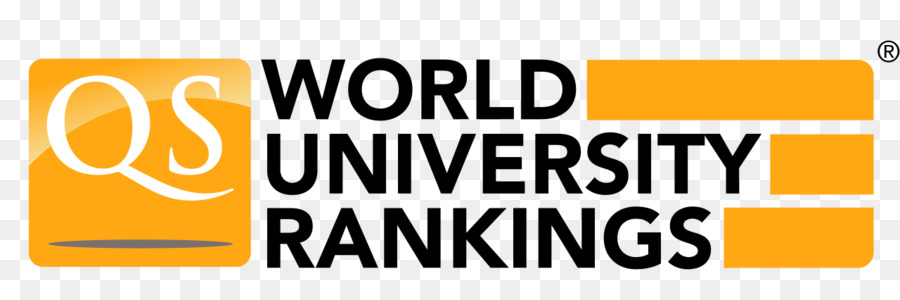

## Importing the Necessary Libraries

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

# Loading the Data

In [2]:
df = pd.read_csv(r"C:\Users\Opicha\Downloads\cwurData.csv")

In [3]:
df.head()

world_rank                            institution         country  \
0           1                     Harvard University             USA   
1           2  Massachusetts Institute of Technology             USA   
2           3                    Stanford University             USA   
3           4                University of Cambridge  United Kingdom   
4           5     California Institute of Technology             USA   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0              1                     7                  9                   1   
1              2                     9                 17                   3   
2              3                    17                 11                   5   
3              1                    10                 24                   4   
4              4                     2                 29                   7   

   publications  influence  citations  broad_impact  patents   score  year  
0             1          1          1           NaN        5  100.00  2012  
1            12          4          4           NaN        1   91.67  2012  
2             4          2          2           NaN       15   89.50  2012  
3            16         16         11           NaN       50   86.17  2012  
4            37         22         22           NaN       18   85.21  2012

Observation:-

    Looking at the head of our data, we can see that there are several columns including the ranking, institution name, country, and various parameters in the basis of which one could predict the university ranking!
    

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


Wow! Such a relief that there are no null values in any of the columns. It would save our time from doing feature engineering on the data! Oh wait, seems like we had a confusion. On checking the 10th row, we see that there are 200 missing entries.

Except the institution name and country column, all the other columns have only numerical entries.

In [5]:
df.describe().T

count         mean         std      min      25%  \
world_rank            2200.0   459.590909  304.320363     1.00   175.75   
national_rank         2200.0    40.278182   51.740870     1.00     6.00   
quality_of_education  2200.0   275.100455  121.935100     1.00   175.75   
alumni_employment     2200.0   357.116818  186.779252     1.00   175.75   
quality_of_faculty    2200.0   178.888182   64.050885     1.00   175.75   
publications          2200.0   459.908636  303.760352     1.00   175.75   
influence             2200.0   459.797727  303.331822     1.00   175.75   
citations             2200.0   413.417273  264.366549     1.00   161.00   
broad_impact          2000.0   496.699500  286.919755     1.00   250.50   
patents               2200.0   433.346364  273.996525     1.00   170.75   
score                 2200.0    47.798395    7.760806    43.36    44.46   
year                  2200.0  2014.318182    0.762130  2012.00  2014.00   

                         50%       75%     max  
world_rank             450.5   725.250  1000.0  
national_rank           21.0    49.000   229.0  
quality_of_education   355.0   367.000   367.0  
alumni_employment      450.5   478.000   567.0  
quality_of_faculty     210.0   218.000   218.0  
publications           450.5   725.000  1000.0  
influence              450.5   725.250   991.0  
citations              406.0   645.000   812.0  
broad_impact           496.0   741.000  1000.0  
patents                426.0   714.250   871.0  
score                   45.1    47.545   100.0  
year                  2014.0  2015.000  2015.0

In [6]:
df.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [7]:
df.isnull().sum()


world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [8]:
df['broad_impact'].nunique()

343

# Data Visualization

Text(0.5, 1.0, 'Correlation Graph')

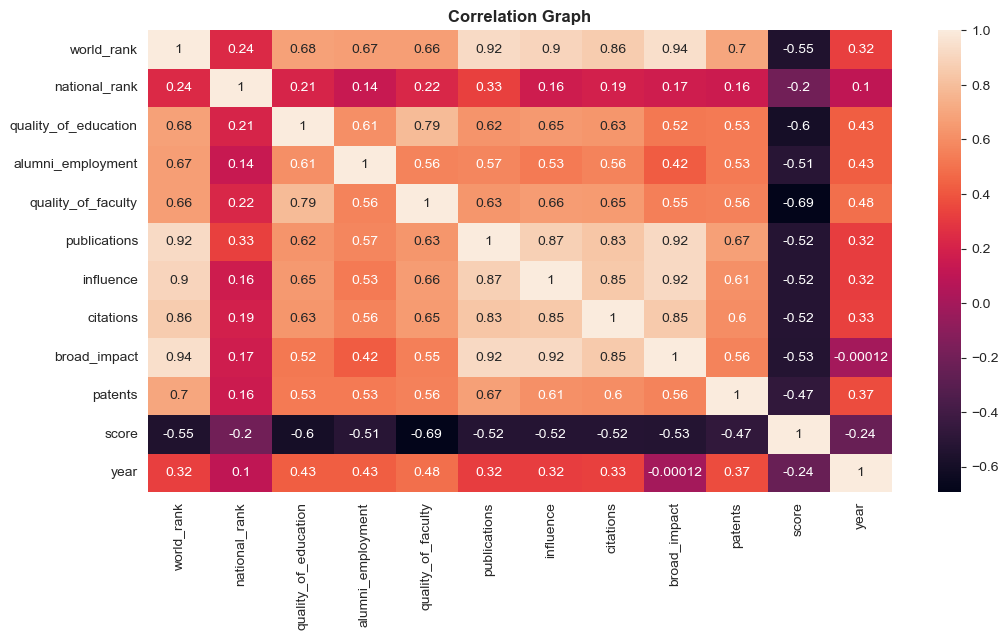

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Graph", fontweight="bold")

    Taking a close look at the above heatmap, we can conclude that:

    World Rank is highly correlated toBroad Impact, Citations, Influence and Publications.

    It is also somewhat correlated to Patents, Quality of Faculty, Alumni Employment, Quality of Education etc.

In [10]:
df.cov()

world_rank  national_rank  quality_of_education  \
world_rank            92610.883046    3756.208897          25090.710964   
national_rank          3756.208897    2677.117668           1337.353580   
quality_of_education  25090.710964    1337.353580          14868.168622   
alumni_employment     37999.668548    1307.965670          13811.196536   
quality_of_faculty    12940.021084     738.478596           6140.110828   
publications          85325.970338    5137.155941          23136.694494   
influence             82697.881289    2528.196358          23880.176763   
citations             68913.128033    2555.112610          20323.080392   
broad_impact          78124.813157    2653.468893          15994.173538   
patents               58218.971227    2260.347442          17644.381289   
score                 -1296.844868     -80.212209           -568.300430   
year                     74.413990       4.059697             39.749287   

                      alumni_employment  quality_of_faculty  publications  \
world_rank                 37999.668548        12940.021084  85325.970338   
national_rank               1307.965670          738.478596   5137.155941   
quality_of_education       13811.196536         6140.110828  23136.694494   
alumni_employment          34886.488848         6682.961227  32458.514088   
quality_of_faculty          6682.961227         4102.515913  12343.406787   
publications               32458.514088        12343.406787  92270.351358   
influence                  29879.417455        12753.093334  80618.202976   
citations                  27612.293206        11043.414574  66645.291893   
broad_impact               20890.475419         8259.593611  76024.618017   
patents                    27032.610725         9741.978720  55893.294051   
score                       -739.815933         -344.749347  -1230.838437   
year                          60.884596           23.664972     73.675286   

                         influence     citations  broad_impact       patents  \
world_rank            82697.881289  68913.128033  78124.813157  58218.971227   
national_rank          2528.196358   2555.112610   2653.468893   2260.347442   
quality_of_education  23880.176763  20323.080392  15994.173538  17644.381289   
alumni_employment     29879.417455  27612.293206  20890.475419  27032.610725   
quality_of_faculty    12753.093334  11043.414574   8259.593611   9741.978720   
publications          80618.202976  66645.291893  76024.618017  55893.294051   
influence             92010.194174  67777.798857  75775.229924  50848.789510   
citations             67777.798857  69889.672098  61194.223232  43369.161000   
broad_impact          75775.229924  61194.223232  82322.945673  41928.455188   
patents               50848.789510  43369.161000  41928.455188  75074.095530   
score                 -1230.811052  -1071.885442  -1005.202078  -1009.651954   
year                     73.583716     66.241432     -0.017759     76.965232   

                            score       year  
world_rank           -1296.844868  74.413990  
national_rank          -80.212209   4.059697  
quality_of_education  -568.300430  39.749287  
alumni_employment     -739.815933  60.884596  
quality_of_faculty    -344.749347  23.664972  
publications         -1230.838437  73.675286  
influence            -1230.811052  73.583716  
citations            -1071.885442  66.241432  
broad_impact         -1005.202078  -0.017759  
patents              -1009.651954  76.965232  
score                   60.230116  -1.414428  
year                    -1.414428   0.580843

<Axes: xlabel='world_rank', ylabel='publications'>

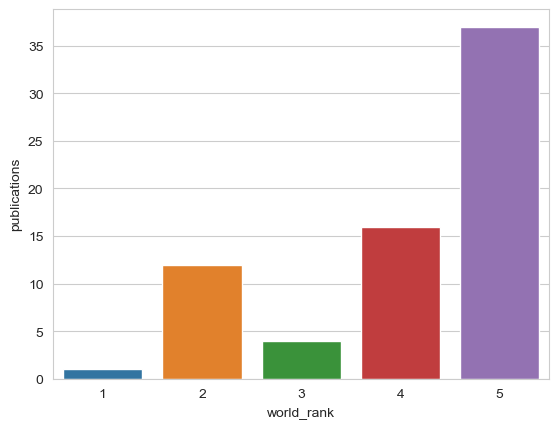

In [11]:
sns.barplot(x=df['world_rank'].head(5), y=df['publications'])

In [12]:
df['country'].unique()

array(['USA', 'United Kingdom', 'Japan', 'Switzerland', 'Israel',
       'Canada', 'France', 'Sweden', 'South Korea', 'Italy', 'Germany',
       'Netherlands', 'Finland', 'Norway', 'Australia', 'Denmark',
       'Singapore', 'Russia', 'China', 'Taiwan', 'Belgium',
       'South Africa', 'Spain', 'Brazil', 'Hong Kong', 'Ireland',
       'Austria', 'New Zealand', 'Portugal', 'Thailand', 'Czech Republic',
       'Malaysia', 'India', 'Greece', 'Mexico', 'Hungary', 'Argentina',
       'Turkey', 'Poland', 'Saudi Arabia', 'Chile', 'Iceland', 'Slovenia',
       'Estonia', 'Lebanon', 'Croatia', 'Colombia', 'Slovak Republic',
       'Iran', 'Egypt', 'Serbia', 'Bulgaria', 'Lithuania', 'Uganda',
       'United Arab Emirates', 'Uruguay', 'Cyprus', 'Romania',
       'Puerto Rico'], dtype=object)

In [13]:
df['country'].value_counts()

USA                     573
China                   167
Japan                   159
United Kingdom          144
Germany                 115
France                  109
Italy                    96
Spain                    81
Canada                   72
South Korea              72
Australia                58
Taiwan                   46
Brazil                   36
India                    31
Netherlands              29
Switzerland              26
Sweden                   24
Austria                  24
Israel                   22
Finland                  20
Turkey                   20
Belgium                  20
Poland                   18
Iran                     16
Ireland                  16
Portugal                 14
Greece                   14
Hong Kong                12
Norway                   12
New Zealand              12
Hungary                  12
Denmark                  12
South Africa             10
Czech Republic           10
Russia                    9
Saudi Arabia        

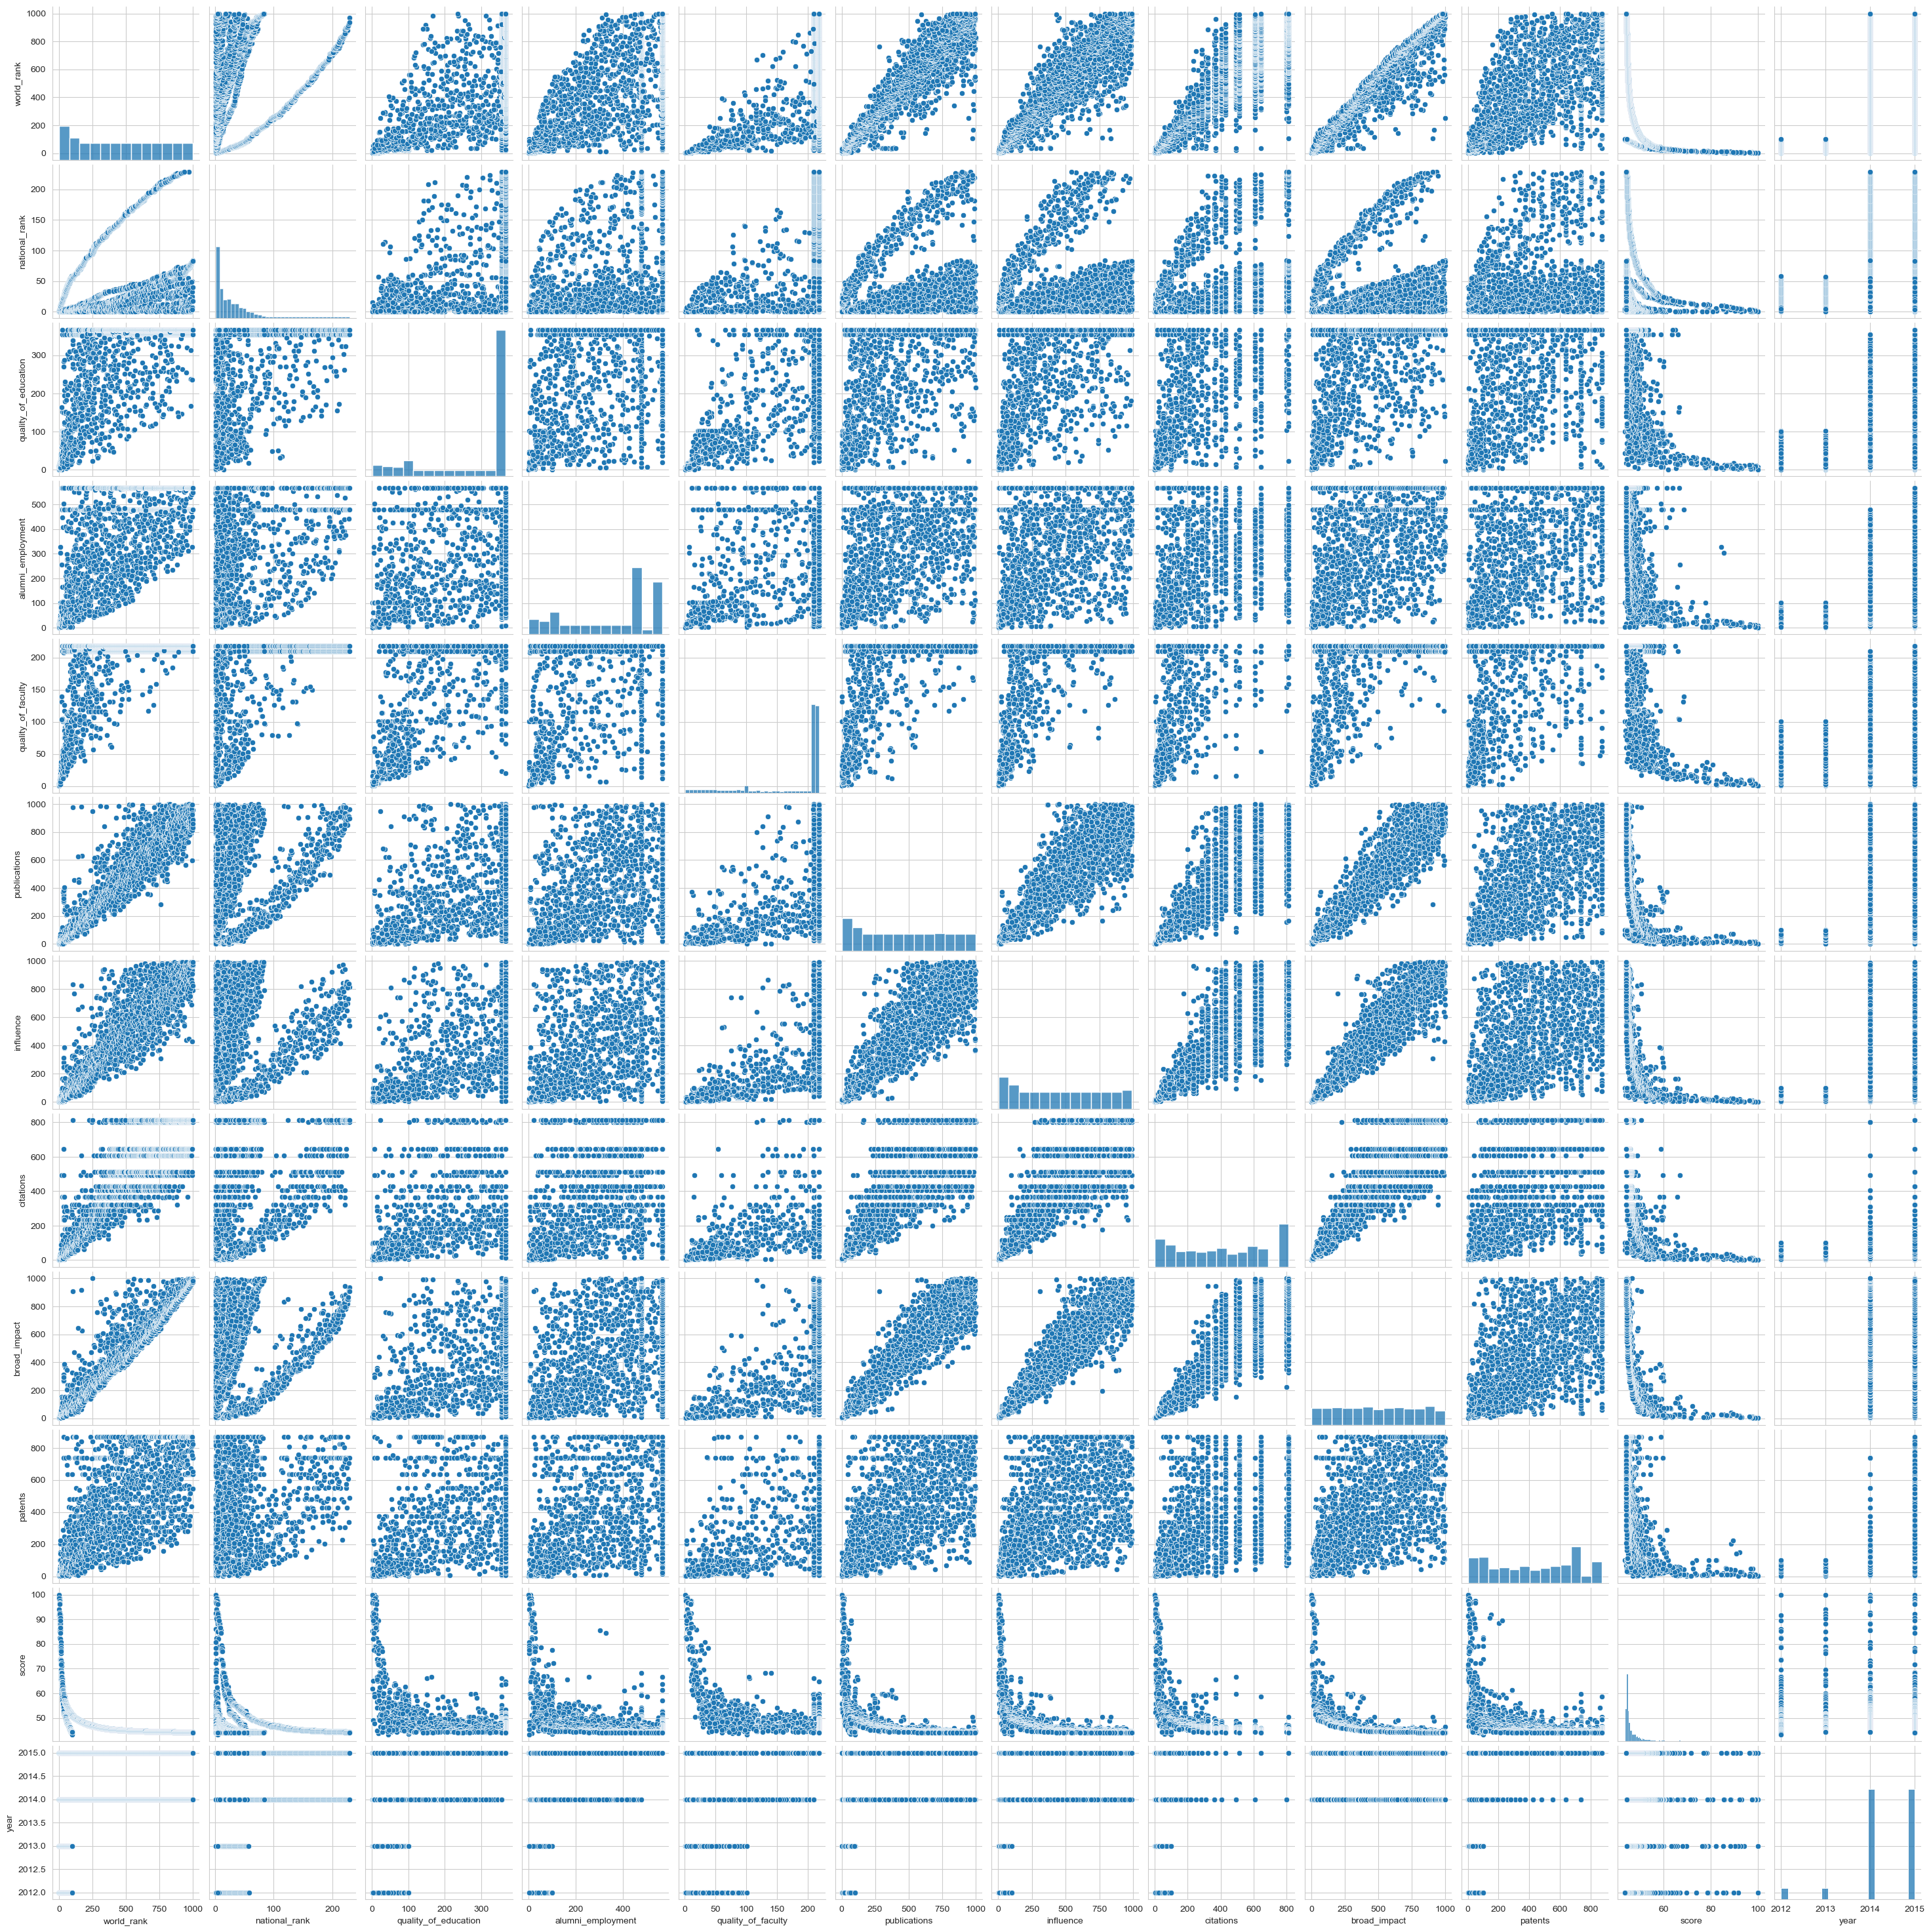

In [14]:
sns.pairplot(df)

In [15]:
df.drop('broad_impact', axis=1, inplace=True)

# Data Manipulation and Machine Learning

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
encoder = LabelEncoder()

df['country'] = encoder.fit_transform(df['country'])
country_mappings = {index: label for index, label in enumerate(encoder.classes_)}

In [18]:
df.drop('institution', axis=1, inplace=True)
df.drop('year', axis=1, inplace=True)

In [19]:
y = df['world_rank']
X = df.drop('world_rank', axis=1)

In [20]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=101)

Linear Regression

    Linear regression is perhaps one of the most well known and well understood algorithms in statistics and machine learning.

    Let’s say we have a dataset which contains information about the relationship between ‘number of hours studied’ and ‘marks obtained’. A number of students have been observed and their hours of study along with their grades are recorded. This will be our training data. Our goal is to design a model that can predict the marks if number of hours studied is provided. Using the training data, a regression line is obtained which will give minimum error. This linear equation is then used to apply for a new data. That is, if we give the number of hours studied by a student as an input, our model should be able to predict their mark with minimum error.

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
print(f"Model R^2: {model.score(X_test, y_test)}")

Model R^2: 0.9207746093382756
